## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance? 
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting? 
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**ANSWERS**
1. If the target variable (y) is a categorical variable, then you use classification. If the target variable (y) is a numeric variable, then you use regression.
2. A confusion table/matrix is where you cross tabulate the true labels with the predicted to see if they align or not.
3. Accuracy calculates the proportion of cases that are predicted correctly. This ids done by summing the cases on the descending diagonal of the confusion matrix and dividing that number by the totl number of observations. Accuracy might not be entirely sufficient becuase a high accuracy can still occur even if the model performs poorly on one class in imbalanced datasets.
4. The root mean squared error measures the magnitude of the prediction errors to let us know how close our predictions were to their true values.
5. Overfitting refers to using too low of a k value which leads the model to be overly sensitive to numerous data points. Underfitting refers to when the k value picked is too high, meaning the model is averaging over too many observations. THis gives answers close to population proportions.
6. Splitting the data between training and test data allows us to test the model on unseen data, which can help detect if the model is overfitting. Secondly, splitting the data allows the model to actually generalize rather than memorize the entirety of the data and predict on only known data.
7. 


Predicting a class label (hard classification)
Strengths: easy to interpret, definite decision if action needs to be taken, direct output
Weaknesses: Does not show uncertainty/model confidence, Somewhat ambigious with model confidence  

Predicting a probability distribution (soft classificiation)
Strengths: Shows uncertainty, more informative, Useful for risk sensitive decisions
Weaknesses: More difficult to interpret, must choose a cutoff threshhold to make a final decision

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [153]:
#1
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/workspace/scratchpad/data/land_mines.csv')
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [154]:
df.describe()

,voltage,height,soil,mine_type
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


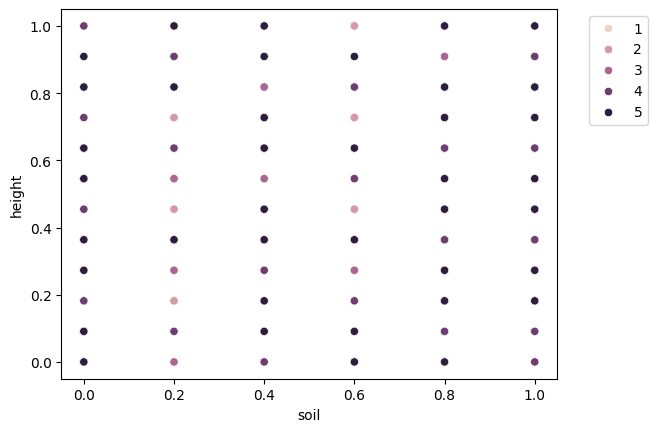

In [155]:
sns.scatterplot(df, x='soil', y='height', hue='mine_type')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

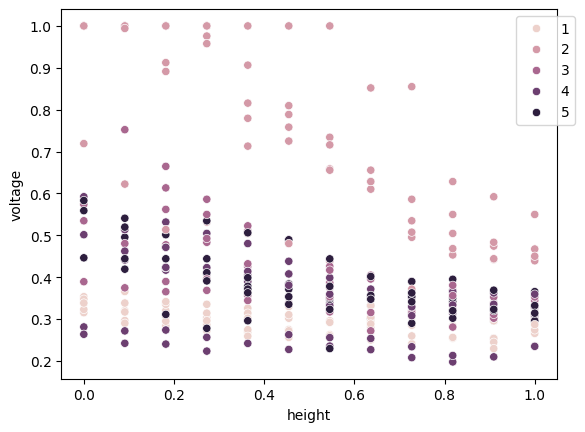

In [156]:
sns.scatterplot(df, x='height', y='voltage', hue='mine_type')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

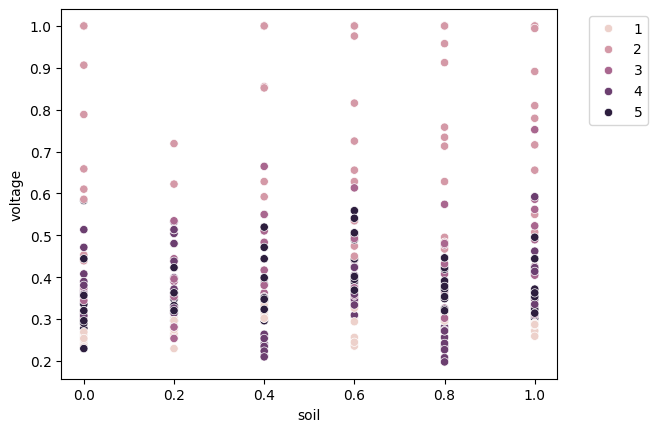

In [157]:
sns.scatterplot(df, x='soil', y='voltage', hue='mine_type')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [158]:
#2
df = df.sample(frac=1, random_state = 100)
test_size = int( .5 * len(df) ) 
df_test = df.iloc[:test_size,:].reset_index(drop=True)
df_train = df.iloc[test_size:,:].reset_index(drop=True)

In [159]:
X_train = df_train.drop('mine_type', axis=1)
y_train = df_train['mine_type']

X_test = df_test.drop('mine_type', axis=1)
y_test = df_test['mine_type']
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [160]:
#3
k = 13
model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
model = model.fit(X_train, y_train) 
y_hat = model.predict(X_test)

I originally tested k=5 but after running the optimal k score code block, I found taht k=13 is the most optimal, therefore I changed my k value to 13.

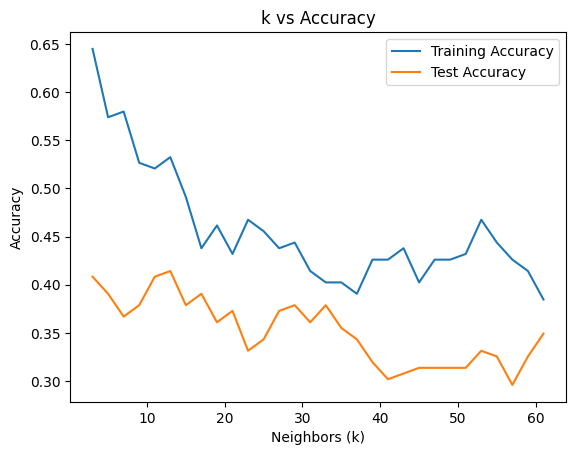

In [161]:
k_grid = np.array([2*i + 3 for i in range(0, 30)])  

test_accuracies = []
train_accuracies = []

# 2) Loop over k values and store accuracies
for k_i in k_grid:
    model_i = KNeighborsClassifier(n_neighbors=k_i)
    model_i.fit(X_train, y_train)

    test_acc = model_i.score(X_test, y_test)
    train_acc = model_i.score(X_train, y_train)

    test_accuracies.append(test_acc)
    train_accuracies.append(train_acc)

# 3) Plot both lines
plt.plot(k_grid, train_accuracies, label="Training Accuracy")
plt.plot(k_grid, test_accuracies, label="Test Accuracy")
plt.xlabel("Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.legend()
plt.show()


In [162]:
is_optimal = test_accuracies == np.max(test_accuracies) # Maximizer Boolean
optimal_indices = np.where( is_optimal ) # Indices that maximize accuracy
k_optimal = k_grid[ optimal_indices ] # Values of k that maximize accuracy
print(f"Optimal k values: {k_optimal}")

Optimal k values: [13]


In [163]:
from sklearn.metrics import confusion_matrix
labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_hat, labels=labels)
cm_df = pd.DataFrame(cm,
                     index=[f"Actual {l}" for l in labels],
                      columns=[f"Predicted {l}" for l in labels])

cm_df



,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5
Actual 1,25,0,10,0,3
Actual 2,0,22,6,3,4
Actual 3,2,3,11,1,16
Actual 4,15,0,9,4,7
Actual 5,7,2,11,0,8


In [164]:
model.score(X_test, y_test)


0.41420118343195267

In [165]:
ct = pd.crosstab(y_test, y_hat)
per_class_accuracy = ct.div(ct.sum(axis=1), axis=0).round(3)
per_class_accuracy

col_0,1,2,3,4,5
mine_type,,,,,
1,0.658,0.000,0.263,0.000,0.079
2,0.000,0.629,0.171,0.086,0.114
3,0.061,0.091,0.333,0.030,0.485
4,0.429,0.000,0.257,0.114,0.200
5,0.250,0.071,0.393,0.000,0.286


The model with the optimal k value is 41.42% accurate. The model performs best for classes 1 and 2 with the highest ccuracy (66% and 63%). Class 4 performs the wirst with about an 11% accuracy, showing a severe inaccuracy in prediction


Although the accuracy of the model is roughly 41%, it performs reasonably well for classes 1 and 2, however, pretty poorly for class 4. The model should not be fully used in automation due to this, rather, human intervention should play a key role due to the mistakes of the model.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [166]:
cdf = pd.read_csv('/workspace/scratchpad/data/USA_cars_datasets.csv')
cdf = cdf[['price', 'year', 'mileage']]
cdf.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [167]:
def MinMaxScaler(x):
    return (x - min(x)) / (max(x) - min(x))

cdf["year"] = MinMaxScaler(cdf["year"])
cdf["mileage"] = MinMaxScaler(cdf["mileage"])


In [168]:
cdf = cdf.sample(frac=1, random_state = 100)
cdf_test_size = int( .2 * len(cdf) ) 
cdf_test = cdf.iloc[:cdf_test_size,:].reset_index(drop=True)
cdf_train = cdf.iloc[cdf_test_size:,:].reset_index(drop=True)

In [169]:
X_train_cdf = cdf_train[["year", "mileage"]]
y_train_cdf = cdf_train["price"]

X_test_cdf  = cdf_test[["year", "mileage"]]
y_test_cdf  = cdf_test["price"]

MSE for k=3 is 126106640.04


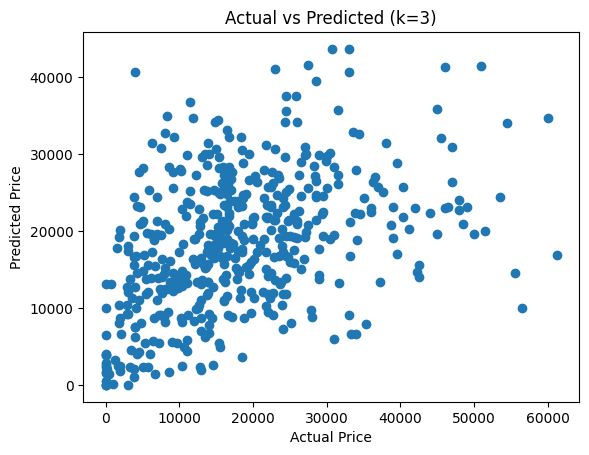

MSE for k=10 is 110926901.00


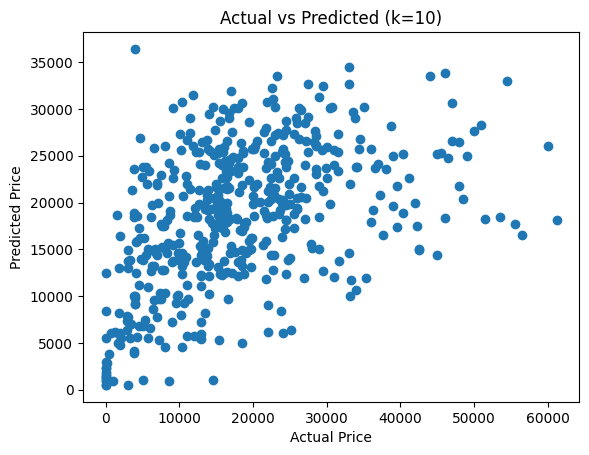

MSE for k=25 is 103382261.50


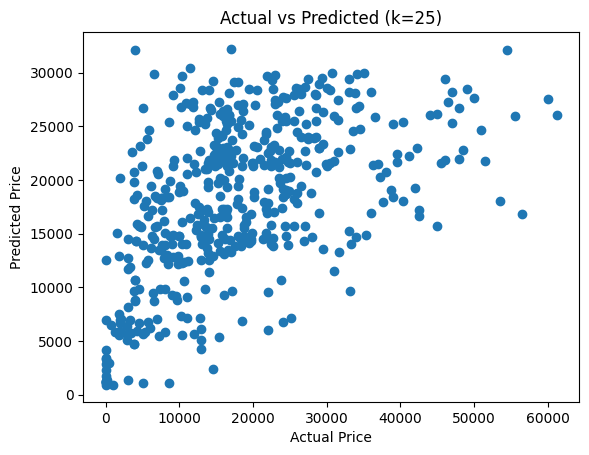

MSE for k=50 is 99846547.39


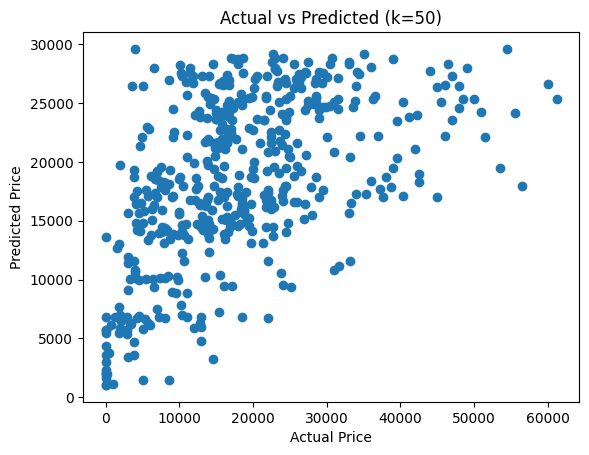

MSE for k=100 is 98383276.36


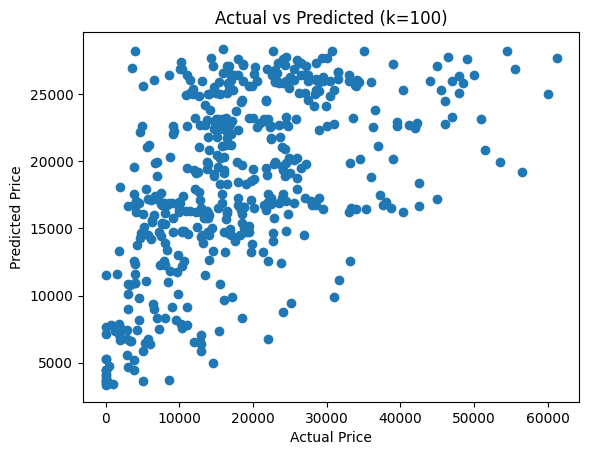

MSE for k=300 is 100619126.94


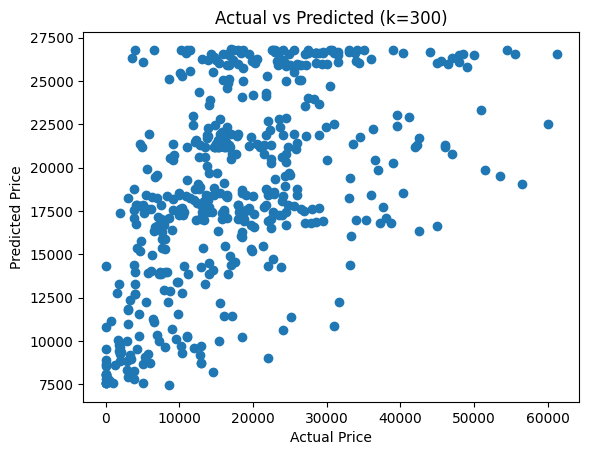

In [170]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
k_grid_cdf = np.array([3, 10, 25, 50, 100, 300])
mses = []

for k1 in k_grid_cdf:
    model_cdf = KNeighborsRegressor(n_neighbors=k1)
    model_cdf.fit(X_train_cdf, y_train_cdf)

    y_hat_cdf = model_cdf.predict(X_test_cdf)

    mse = mean_squared_error(y_test_cdf, y_hat_cdf)
    mses.append(mse)

    print(f"MSE for k={k1} is {mse:.2f}")

    plt.figure()
    plt.scatter(y_test_cdf, y_hat_cdf)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted (k={k1})")
    plt.show()

In [171]:
#5
best_k = k_grid_cdf[np.argmin(mses)]
print("Best k:", best_k)

Best k: 100


#6
When k is very small in this data (and in general), the model tends to overfit the data. The predictions are very sensitive to the training points and create a very widespread scatterplot. As k increases, the predictions become smoother becuase of more neighbors. However, as k becomes too large, the model tends to underfit the data becuase points tend to cluster around the mean and extreme outlier prices. Ultimately, too small of a k overfits the data and too large of a k underfits the data.

As k increases, the model averages over more neighbors and the predictions cluster towards the middle. With a lower k, the scatter plot shows very scattered predictions and much more spread than a plot with a higher k value. 

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [172]:
#1
adf = pd.read_csv('/workspace/scratchpad/data/airbnb_hw.csv')
adf = adf.loc[:, ["Review Scores Rating", "Price", "Beds"]]
adf.shape

(30478, 3)

In [173]:
adf["Price"] = (adf["Price"].str.replace(",", "", regex=False).astype(float))

In [174]:
#2
missing_reviews = adf.loc[adf["Review Scores Rating"].isnull(), :]
missing_reviews = adf[
    (adf["Review Scores Rating"].isnull()) &
    (adf["Price"].notnull()) &
    (adf["Beds"].notnull())
]
missing_reviews

,Review Scores Rating,Price,Beds
0,NaN,145.0,1.0
1,NaN,37.0,1.0
2,NaN,28.0,1.0
3,NaN,199.0,3.0
13,NaN,68.0,1.0
...,...,...,...
30473,NaN,300.0,5.0
30474,NaN,125.0,2.0
30475,NaN,80.0,1.0
30476,NaN,35.0,1.0


In [175]:
#3
complete_reviews = adf.dropna(axis=0, how='any')
complete_reviews

,Review Scores Rating,Price,Beds
4,96.0,549.0,3.0
5,100.0,149.0,1.0
6,100.0,250.0,1.0
7,94.0,90.0,1.0
8,90.0,270.0,2.0
...,...,...,...
30332,100.0,90.0,1.0
30347,80.0,65.0,1.0
30378,100.0,55.0,1.0
30404,100.0,60.0,1.0


In [176]:
#4
X_adf = complete_reviews[["Price", "Beds"]]
y_adf = complete_reviews["Review Scores Rating"]


In [177]:
from sklearn.model_selection import train_test_split
X_train_adf, X_test_adf, y_train_adf, y_test_adf = train_test_split(X_adf,y_adf,test_size=0.2,random_state=42
)

In [178]:
from sklearn.preprocessing import MinMaxScaler as SK_MinMaxScaler

scaler_adf = SK_MinMaxScaler()

X_train_adf = scaler_adf.fit_transform(X_train_adf)
X_test_adf = scaler_adf.transform(X_test_adf)

In [179]:
k_values_adf = range(1, 31)
rmse_scores_adf = []

for k in k_values_adf:
    model_adf = KNeighborsRegressor(n_neighbors=k)
    model_adf.fit(X_train_adf, y_train_adf)
    y_pred_adf = model_adf.predict(X_test_adf)
    rmse_adf = np.sqrt(mean_squared_error(y_test_adf, y_pred_adf))
    rmse_scores_adf.append(rmse_adf)

In [180]:
best_k_adf = list(k_values_adf)[np.argmin(rmse_scores_adf)]
print("Best k:", best_k_adf)

Best k: 29


I chose k by iterating over multiple values and selected the value that minimized RMSE on the test set.

In [181]:
#5
best_model_adf = KNeighborsRegressor(n_neighbors=best_k_adf)

best_model_adf.fit(X_adf, y_adf);

In [182]:
X_missing_adf = missing_reviews[["Price", "Beds"]]

In [183]:
X_missing_adf = scaler_adf.transform(X_missing_adf)
predicted_missing_adf = best_model_adf.predict(X_missing_adf)

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [184]:
predicted_missing_adf = best_model_adf.predict(X_missing_adf)

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [185]:
missing_reviews["Imputed Rating"] = predicted_missing_adf
missing_reviews.head()

/tmp/ipykernel_9429/2162010571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_reviews["Imputed Rating"] = predicted_missing_adf


,Review Scores Rating,Price,Beds,Imputed Rating
0,NaN,145.0,1.0,90.896552
1,NaN,37.0,1.0,90.896552
2,NaN,28.0,1.0,90.896552
3,NaN,199.0,3.0,90.896552
13,NaN,68.0,1.0,90.896552


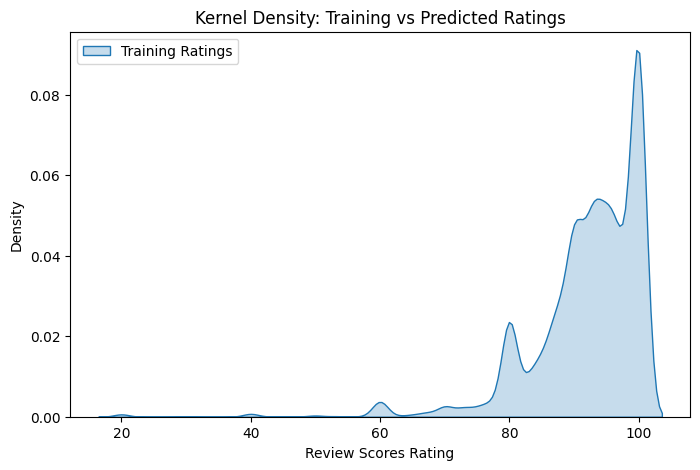

In [186]:
#6
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_ratings_adf = np.asarray(y_adf).astype(float).ravel()
pred_ratings_adf  = np.asarray(predicted_missing_adf).astype(float).ravel()

plt.figure(figsize=(8,5))
sns.kdeplot(train_ratings_adf, label="Training Ratings", fill=True)
sns.kdeplot(pred_ratings_adf, label="Predicted Missing Ratings", fill=True, warn_singular=False)
plt.legend()
plt.title("Kernel Density: Training vs Predicted Ratings")
plt.xlabel("Review Scores Rating")
plt.show()

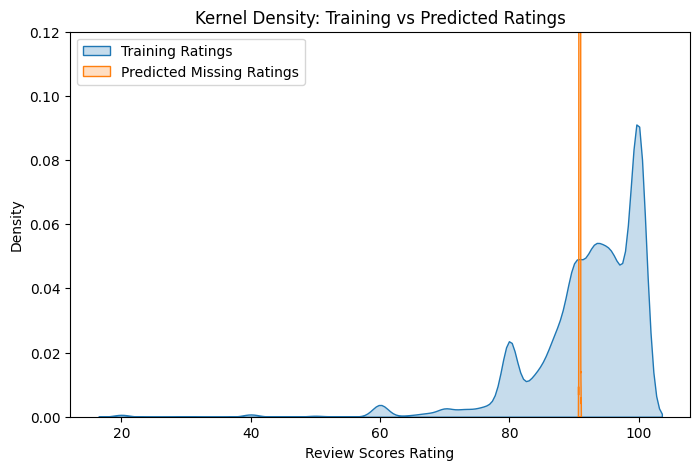

In [ ]:
train_ratings = complete_reviews["Review Scores Rating"].astype(float).to_numpy()

pred = np.asarray(predicted_missing_adf).astype(float)
pred_jitter = pred + np.random.normal(0, 0.05, size=len(pred))  # slightly more jitter

plt.figure(figsize=(8,5))
sns.kdeplot(train_ratings, fill=True, label="Training Ratings")
sns.kdeplot(pred_jitter, fill=True, label="Predicted Missing Ratings")

plt.ylim(0, 0.12) 
plt.legend()
plt.title("Kernel Density: Training vs Predicted Ratings")
plt.xlabel("Review Scores Rating")
plt.show()

#6 
The KDE plot for the predicted missing values does not show an actual curve becuase there is simply no variance (all predicted values are the same). This suggests that Price and Beds are weak predictors of Review Scores Rating, leading the kNN regressor to produce nearly constant predictions. The training data has some variance with the most dense value being right under 100. In order to visualize anything regarding the predicted value, I needed to generate code becuase otherwise, the predicted missing ratings would not show. Ultimately, becuase it has one value, it is a straight line which is somewhat near the peak of the most dense value regarding the training ratings.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)